# Abdelrahman Ayman Samy Mohamed, 222100930
# Yassmin Mohamed Mahmoud Metwally, 222101910
# Shahd Mamdouh Ali Hassan, 222102250
# Seif Amr Abdelhafez abdo , 222102312

In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import seaborn as sns

# Data loading

In [3]:
print("=== Loading Multiple Course Platforms ===\n")

# Load Udemy courses
udemy_data = pd.read_csv("../data/udemy_courses.csv")
udemy_data['platform'] = 'Udemy'

# Load Coursera courses  
coursera_data = pd.read_csv("../data/coursera_data.csv")
coursera_data['platform'] = 'Coursera'

# Standardize column names
coursera_data = coursera_data.rename(columns={
    'course_students_enrolled': 'num_subscribers',
    'course_difficulty': 'level',
    'course_Certificate_type': 'certificate_type'
})

# Convert Coursera num_subscribers from string (e.g., "5.3k") to numeric
def convert_subscribers(value):
    if pd.isna(value):
        return 0
    if isinstance(value, str):
        value = value.lower().strip()
        if 'k' in value:
            return int(float(value.replace('k', '')) * 1000)
        elif 'm' in value:
            return int(float(value.replace('m', '')) * 1000000)
        return int(float(value))
    return int(value)

coursera_data['num_subscribers'] = coursera_data['num_subscribers'].apply(convert_subscribers)

print(f"Udemy courses loaded: {len(udemy_data)}")
print(f"Coursera courses loaded: {len(coursera_data)}")

# Create unified structure
udemy_selected = udemy_data[['course_title', 'level', 'num_subscribers', 'platform', 
                              'price', 'num_reviews', 'subject']].copy()
udemy_selected['course_rating'] = np.nan
udemy_selected['course_organization'] = np.nan

coursera_selected = coursera_data[['course_title', 'level', 'num_subscribers', 'platform', 
                                    'course_rating', 'course_organization']].copy()
coursera_selected['price'] = np.nan
coursera_selected['num_reviews'] = np.nan
coursera_selected['subject'] = np.nan

# Merge datasets
data = pd.concat([udemy_selected, coursera_selected], ignore_index=True)

print(f"\n✓ Combined dataset shape: {data.shape}")
print(f"  Udemy courses: {(data['platform']=='Udemy').sum()}")
print(f"  Coursera courses: {(data['platform']=='Coursera').sum()}")

=== Loading Multiple Course Platforms ===

Udemy courses loaded: 3678
Coursera courses loaded: 891

✓ Combined dataset shape: (4569, 9)
  Udemy courses: 3678
  Coursera courses: 891


In [5]:
data.head()

,course_title,level,num_subscribers,platform,price,num_reviews,subject,course_rating,course_organization
0,Ultimate Investment Banking Course,All Levels,2147,Udemy,200.0,23.0,Business Finance,NaN,NaN
1,Complete GST Course & Certification - Grow You...,All Levels,2792,Udemy,75.0,923.0,Business Finance,NaN,NaN
2,Financial Modeling for Business Analysts and C...,Intermediate Level,2174,Udemy,45.0,74.0,Business Finance,NaN,NaN
3,Beginner to Pro - Financial Analysis in Excel ...,All Levels,2451,Udemy,95.0,11.0,Business Finance,NaN,NaN
4,How To Maximize Your Profits Trading Options,Intermediate Level,1276,Udemy,200.0,45.0,Business Finance,NaN,NaN


# Checking data info and missing values

In [ ]:
print("\n=== Dataset Info ===")
data.info()

print("\n=== Missing Values by Platform ===")
print("\nUdemy missing values:")
print(data[data['platform']=='Udemy'].isnull().sum()[data[data['platform']=='Udemy'].isnull().sum() > 0])
print("\nCoursera missing values:")
print(data[data['platform']=='Coursera'].isnull().sum()[data[data['platform']=='Coursera'].isnull().sum() > 0])

print(f"\nTotal missing values: {data.isnull().sum().sum()}")


=== Dataset Info ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4569 entries, 0 to 4568
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   course_title         4569 non-null   object 
 1   level                4569 non-null   object 
 2   num_subscribers      4569 non-null   int64  
 3   platform             4569 non-null   object 
 4   price                3678 non-null   float64
 5   num_reviews          3678 non-null   float64
 6   subject              3678 non-null   object 
 7   course_rating        891 non-null    float64
 8   course_organization  891 non-null    object 
dtypes: float64(3), int64(1), object(5)
memory usage: 321.4+ KB

=== Missing Values by Platform ===

Udemy missing values:
course_rating          3678
course_organization    3678
dtype: int64

Coursera missing values:
price          891
num_reviews    891
subject        891
dtype: int64

Total missing values: 10029
Note:

# Handle missing values

In [7]:
print("=== Handle Missing Values ===\n")

# Critical columns must not be missing
critical_cols = ['course_title', 'level', 'num_subscribers', 'platform']
before_drop = len(data)
data = data.dropna(subset=critical_cols)
after_drop = len(data)
print(f"Dropped {before_drop - after_drop} row(s) with missing critical identifiers")

# Fill platform-specific missing values
print("\n--- Filling Platform-Specific Missing Values ---")

# For Udemy courses: course_rating will be computed later from engagement
# For Coursera courses: fill missing price with 0 (many are free/audit)
data.loc[data['platform'] == 'Coursera', 'price'] = data.loc[data['platform'] == 'Coursera', 'price'].fillna(0)
data.loc[data['platform'] == 'Coursera', 'num_reviews'] = data.loc[data['platform'] == 'Coursera', 'num_reviews'].fillna(0)

# Create unified subject/category field
data['category'] = data['subject'].fillna(data['course_organization'])
print(f"Created unified 'category' field from subject/organization")

print("\n--- Verification ---")
print(f"Missing in critical columns: {data[critical_cols].isnull().sum().sum()}")
print(f"Missing in 'category': {data['category'].isnull().sum()}")
print(f"\nFinal shape: {data.shape}")
print("✓ Dataset is clean and ready!")


=== Handle Missing Values ===

Dropped 0 row(s) with missing critical identifiers

--- Filling Platform-Specific Missing Values ---
Created unified 'category' field from subject/organization

--- Verification ---
Missing in critical columns: 0
Missing in 'category': 0

Final shape: (4569, 10)
✓ Dataset is clean and ready!


# Remove duplicate tracks

In [8]:
print("=== Remove Duplicates ===\n")

before_dedup = len(data)
data = data.drop_duplicates(subset=['course_title', 'platform'], keep='first')
after_dedup = len(data)

print(f"Removed {before_dedup - after_dedup} duplicate courses")
print(f"Unique courses: {len(data)}")
print(f"Final dataset shape: {data.shape}")

# Show platform distribution
print("\n--- Platform Distribution ---")
print(data['platform'].value_counts())


=== Remove Duplicates ===

Removed 18 duplicate courses
Unique courses: 4551
Final dataset shape: (4551, 10)

--- Platform Distribution ---
platform
Udemy       3663
Coursera     888
Name: count, dtype: int64


# 1-5 rating

In [10]:
print("=== Create Unified Rating System ===\n")

# For UDEMY: Create engagement-based rating
print("--- Processing Udemy Courses ---")
udemy_mask = data['platform'] == 'Udemy'

# Create engagement score for Udemy (reviews + subscribers)
data.loc[udemy_mask, 'engagement_score'] = (
    0.6 * (data.loc[udemy_mask, 'num_reviews'] / data.loc[udemy_mask, 'num_reviews'].max()) + 
    0.4 * (data.loc[udemy_mask, 'num_subscribers'] / data.loc[udemy_mask, 'num_subscribers'].max())
) * 100

# Convert engagement to 1-5 rating (continuous scale, not binned)
# Scale engagement_score (0-100) to rating (1-5)
min_engagement = data.loc[udemy_mask, 'engagement_score'].min()
max_engagement = data.loc[udemy_mask, 'engagement_score'].max()

data.loc[udemy_mask, 'rating'] = 1 + (
    (data.loc[udemy_mask, 'engagement_score'] - min_engagement) / 
    (max_engagement - min_engagement)
) * 4  # Scale to 1-5 range

print(f"Udemy courses with computed ratings: {udemy_mask.sum()}")
print(f"  Rating range: {data.loc[udemy_mask, 'rating'].min():.2f} - {data.loc[udemy_mask, 'rating'].max():.2f}")

# For COURSERA: Use existing course_rating (keep decimals)
print("\n--- Processing Coursera Courses ---")
coursera_mask = data['platform'] == 'Coursera'

# Keep Coursera ratings as-is (already decimal)
data.loc[coursera_mask, 'rating'] = data.loc[coursera_mask, 'course_rating']
print(f"Coursera courses with existing ratings: {coursera_mask.sum()}")
print(f"  Rating range: {data.loc[coursera_mask, 'rating'].min():.2f} - {data.loc[coursera_mask, 'rating'].max():.2f}")

# Overall rating statistics
print("\n--- Unified Rating Statistics ---")
print(data['rating'].describe())

# Show distribution by platform
print("\n--- Rating Statistics by Platform ---")
print(data.groupby('platform')['rating'].describe())

# Sample courses across rating spectrum
print("\n--- Sample Courses Across Rating Spectrum ---")
rating_bins = [1, 2, 3, 4, 5]
for lower, upper in zip(rating_bins[:-1], rating_bins[1:]):
    print(f"\nRating {lower}-{upper}:")
    for platform in ['Udemy', 'Coursera']:
        sample_df = data[(data['rating'] >= lower) & (data['rating'] < upper) & (data['platform'] == platform)]
        if len(sample_df) > 0:
            sample = sample_df.iloc[0]
            print(f"  [{platform}] Rating: {sample['rating']:.2f} - {sample['course_title'][:45]}")
            print(f"    Subscribers: {sample['num_subscribers']:,}")


=== Create Unified Rating System ===

--- Processing Udemy Courses ---
Udemy courses with computed ratings: 3663
  Rating range: 1.00 - 5.00

--- Processing Coursera Courses ---
Coursera courses with existing ratings: 888
  Rating range: 3.30 - 5.00

--- Unified Rating Statistics ---
count    4551.000000
mean        1.751139
std         1.449767
min         1.000000
25%         1.003144
50%         1.016310
75%         1.115131
max         5.000000
Name: rating, dtype: float64

--- Rating Statistics by Platform ---
           count      mean       std  min      25%       50%       75%  max
platform                                                                   
Coursera   888.0  4.676914  0.162272  3.3  4.60000  4.700000  4.800000  5.0
Udemy     3663.0  1.041860  0.161699  1.0  1.00177  1.010068  1.028492  5.0

--- Sample Courses Across Rating Spectrum ---

Rating 1-2:
  [Udemy] Rating: 1.02 - Ultimate Investment Banking Course
    Subscribers: 2,147

Rating 2-3:
  [Udemy] Rating: 2

# Scale numeric features

In [12]:
# Cell 6: Feature Scaling
print("=== Feature Scaling ===\n")

# Define numeric features for content-based recommendation
numeric_features = ['num_subscribers', 'price', 'num_reviews']

print(f"Features to scale: {numeric_features}")

# Initialize MinMaxScaler to scale features to [0,1] range
scaler = MinMaxScaler()
data_scaled = data.copy()

# Scale numeric features
scaled_values = scaler.fit_transform(data[numeric_features])
scaled_feature_names = [f"{col}_scaled" for col in numeric_features]

# Add scaled features to dataframe
scaled_df = pd.DataFrame(scaled_values, columns=scaled_feature_names, index=data.index)
data_scaled = pd.concat([data_scaled, scaled_df], axis=1)

print(f"\n✓ Scaled features added: {scaled_feature_names}")
print(f"✓ Final shape: {data_scaled.shape}")

# Show before/after scaling statistics
print("\n--- Before Scaling (Original Values) ---")
print(data[numeric_features].describe())

print("\n--- After Scaling (0-1 Range) ---")
print(data_scaled[scaled_feature_names].describe())

# Show before/after for sample courses
print("\n--- Example: Before vs After Scaling (First 5 Courses) ---")
comparison_cols = ['course_title', 'platform', 'num_subscribers', 'num_subscribers_scaled', 
                   'price', 'price_scaled']
data_scaled[comparison_cols].head()


=== Feature Scaling ===

Features to scale: ['num_subscribers', 'price', 'num_reviews']

✓ Scaled features added: ['num_subscribers_scaled', 'price_scaled', 'num_reviews_scaled']
✓ Final shape: (4551, 15)

--- Before Scaling (Original Values) ---
       num_subscribers        price   num_reviews
count     4.551000e+03  4551.000000   4551.000000
mean      1.957377e+04    53.252033    126.062184
std       7.433979e+04    60.741879    843.172696
min       0.000000e+00     0.000000      0.000000
25%       2.175000e+02     0.000000      0.000000
50%       1.452000e+03    30.000000     10.000000
75%       7.884000e+03    75.000000     46.000000
max       2.500000e+06   200.000000  27445.000000

--- After Scaling (0-1 Range) ---
       num_subscribers_scaled  price_scaled  num_reviews_scaled
count             4551.000000   4551.000000         4551.000000
mean                 0.007830      0.266260            0.004593
std                  0.029736      0.303709            0.030722
min         

,course_title,platform,num_subscribers,num_subscribers_scaled,price,price_scaled
0,Ultimate Investment Banking Course,Udemy,2147,0.000859,200.0,1.000
1,Complete GST Course & Certification - Grow You...,Udemy,2792,0.001117,75.0,0.375
2,Financial Modeling for Business Analysts and C...,Udemy,2174,0.000870,45.0,0.225
3,Beginner to Pro - Financial Analysis in Excel ...,Udemy,2451,0.000980,95.0,0.475
4,How To Maximize Your Profits Trading Options,Udemy,1276,0.000510,200.0,1.000


# Saving processed track data


In [13]:
data_scaled.to_csv("../data/courses_processed.csv", index=False)
print("=== Saved Processed Course Data ===")
print(f"File: ../data/courses_processed.csv")
print(f"Shape: {data_scaled.shape}")
print(f"Columns: {len(data_scaled.columns)}")
print(f"\nColumn names:")
print(data_scaled.columns.tolist())


=== Saved Processed Course Data ===
File: ../data/courses_processed.csv
Shape: (4551, 15)
Columns: 15

Column names:
['course_title', 'level', 'num_subscribers', 'platform', 'price', 'num_reviews', 'subject', 'course_rating', 'course_organization', 'category', 'engagement_score', 'rating', 'num_subscribers_scaled', 'price_scaled', 'num_reviews_scaled']


# Generate Synthetic Users and Interactions

In [15]:
from sklearn.cluster import KMeans

print("=== Generating Synthetic Users and Interactions ===")

# Set random seed for reproducibility
np.random.seed(42)

NUM_USERS = 5000  
MIN_INTERACTIONS_PER_USER = 10  
MAX_INTERACTIONS_PER_USER = 12  
TARGET_INTERACTIONS = 50000  

print(f"Target: {NUM_USERS} users, ~{TARGET_INTERACTIONS} interactions\n")

# Create user interaction data
user_ids = []
course_indices = []
ratings_list = []

for user_id in range(NUM_USERS):
    # Random number of interactions per user
    num_interactions = np.random.randint(MIN_INTERACTIONS_PER_USER, MAX_INTERACTIONS_PER_USER + 1)
    
    # User preferences: focus on certain categories/levels
    user_level_pref = np.random.choice(data_scaled['level'].unique())
    user_category_pref = np.random.choice(data_scaled['category'].unique())
    
    # 70% probability to select courses matching preferences
    if np.random.random() < 0.7:
        filtered_courses = data_scaled[
            (data_scaled['level'] == user_level_pref) | 
            (data_scaled['category'] == user_category_pref)
        ]
        if len(filtered_courses) > 0:
            selected_indices = np.random.choice(filtered_courses.index, 
                                               size=min(num_interactions, len(filtered_courses)), 
                                               replace=False)
        else:
            selected_indices = np.random.choice(data_scaled.index, size=num_interactions, replace=False)
    else:
        # 30% random exploration
        selected_indices = np.random.choice(data_scaled.index, size=num_interactions, replace=False)
    
    # Generate ratings based on course quality
    for idx in selected_indices:
        course_rating = data_scaled.loc[idx, 'rating']
        # User rating centered around course rating with some noise
        user_rating = np.clip(course_rating + np.random.normal(0, 0.5), 1, 5)
        
        user_ids.append(user_id)
        course_indices.append(idx)
        ratings_list.append(round(user_rating, 1))

# Create interactions dataframe
interactions = pd.DataFrame({
    'user_id': user_ids,
    'course_index': course_indices,
    'rating': ratings_list
})

print(f"Generated {len(interactions)} interactions")
print(f"Users: {NUM_USERS}")
print(f"Avg interactions per user: {len(interactions)/NUM_USERS:.1f}\n")


=== Generating Synthetic Users and Interactions ===
Target: 5000 users, ~50000 interactions

Generated 55075 interactions
Users: 5000
Avg interactions per user: 11.0



# Cluster Courses by Difficulty and Engagement

In [16]:
print("=== Cluster courses by difficulty and engagement ===\n")

# Use rating (quality) and num_subscribers_scaled (popularity) for clustering
cluster_features = data_scaled[['rating', 'num_subscribers_scaled']].values

# Create 8 clusters (e.g., high-quality popular, niche advanced, etc.)
n_clusters = 8
kmeans = KMeans(n_clusters=n_clusters, random_state=42, n_init=10)
data_scaled['course_cluster'] = kmeans.fit_predict(cluster_features)

print(f"Created {n_clusters} course clusters based on quality and popularity")
print("\nCluster distribution:")
print(data_scaled['course_cluster'].value_counts().sort_index())

# Show cluster characteristics
print("\n--- Cluster Characteristics (avg rating, avg popularity) ---")
cluster_chars = data_scaled.groupby('course_cluster')[['rating', 'num_subscribers_scaled']].mean()

for idx, row in cluster_chars.iterrows():
    cluster_type = ""
    if row['rating'] > 4.0 and row['num_subscribers_scaled'] > 0.5:
        cluster_type = "High-Quality Popular"
    elif row['rating'] > 4.0 and row['num_subscribers_scaled'] <= 0.5:
        cluster_type = "High-Quality Niche"
    elif row['rating'] <= 4.0 and row['num_subscribers_scaled'] > 0.5:
        cluster_type = "Average Popular"
    else:
        cluster_type = "Average Niche"
    
    print(f"  Cluster {idx}: rating={row['rating']:.2f}, popularity={row['num_subscribers_scaled']:.3f} ({cluster_type})")

# Show sample courses from each cluster
print("\n--- Sample Course from Each Cluster ---")
for cluster_id in range(n_clusters):
    sample = data_scaled[data_scaled['course_cluster'] == cluster_id].iloc[0]
    print(f"\nCluster {cluster_id}: {sample['course_title'][:50]}")
    print(f"  Platform: {sample['platform']}, Level: {sample['level']}")
    print(f"  Rating: {sample['rating']:.2f}, Subscribers: {sample['num_subscribers']:,}")


=== Cluster courses by difficulty and engagement ===

Created 8 course clusters based on quality and popularity

Cluster distribution:
course_cluster
0    3302
1     418
2      14
3     141
4     299
5      10
6     325
7      42
Name: count, dtype: int64

--- Cluster Characteristics (avg rating, avg popularity) ---
  Cluster 0: rating=1.01, popularity=0.001 (Average Niche)
  Cluster 1: rating=4.66, popularity=0.035 (High-Quality Niche)
  Cluster 2: rating=2.26, popularity=0.030 (Average Niche)
  Cluster 3: rating=4.43, popularity=0.029 (High-Quality Niche)
  Cluster 4: rating=1.15, popularity=0.005 (Average Niche)
  Cluster 5: rating=3.72, popularity=0.031 (Average Niche)
  Cluster 6: rating=4.82, popularity=0.038 (High-Quality Niche)
  Cluster 7: rating=1.56, popularity=0.016 (Average Niche)

--- Sample Course from Each Cluster ---

Cluster 0: Ultimate Investment Banking Course
  Platform: Udemy, Level: All Levels
  Rating: 1.02, Subscribers: 2,147

Cluster 1: (ISC)² Systems Security

# Generate User Profiles with Learning Preferences


In [17]:
print("\n=== Generate User Profiles ===\n")

users = []
for user_id in range(NUM_USERS):
    # Each user has preferred course clusters (learning style preferences)
    # Most users prefer 2-3 course types, some explore more
    
    if np.random.random() < 0.6:  # 60% have strong preferences (focused learners)
        n_preferred = np.random.choice([2, 3], p=[0.5, 0.5])
        preferred_clusters = np.random.choice(n_clusters, size=n_preferred, replace=False)
        weights = np.random.dirichlet(np.ones(n_preferred) * 3)  # Concentrated preferences
    else:  # 40% are explorers (diverse learners)
        n_preferred = np.random.choice([4, 5, 6], p=[0.4, 0.4, 0.2])
        preferred_clusters = np.random.choice(n_clusters, size=n_preferred, replace=False)
        weights = np.random.dirichlet(np.ones(n_preferred))  # More uniform
    
    users.append({
        'user_id': f'U{user_id:05d}',
        'preferred_clusters': preferred_clusters,
        'cluster_weights': weights,
        'n_interactions': np.random.randint(MIN_INTERACTIONS_PER_USER, MAX_INTERACTIONS_PER_USER + 1)
    })

users_df = pd.DataFrame(users)
print(f"Generated {len(users_df)} user profiles")
print(f"  60% focused learners (2-3 preferred course types)")
print(f"  40% diverse learners (4-6 preferred course types)")
print(f"\nAvg interactions per user: {users_df['n_interactions'].mean():.1f}")
print(f"Total target interactions: {users_df['n_interactions'].sum():,}")

# Show sample user profiles
print("\n--- Sample User Profiles ---")
for i in range(3):
    user = users_df.iloc[i]
    print(f"\n{user['user_id']}:")
    print(f"  Preferred clusters: {user['preferred_clusters']}")
    print(f"  Cluster weights: {user['cluster_weights']}")
    print(f"  Planned interactions: {user['n_interactions']}")



=== Generate User Profiles ===

Generated 5000 user profiles
  60% focused learners (2-3 preferred course types)
  40% diverse learners (4-6 preferred course types)

Avg interactions per user: 11.0
Total target interactions: 54,944

--- Sample User Profiles ---

U00000:
  Preferred clusters: [2 6 4]
  Cluster weights: [0.11397292 0.33251821 0.55350887]
  Planned interactions: 11

U00001:
  Preferred clusters: [3 5 4]
  Cluster weights: [0.32922022 0.21675993 0.45401985]
  Planned interactions: 12

U00002:
  Preferred clusters: [6 5 3 7]
  Cluster weights: [0.27464969 0.48809779 0.22130712 0.0159454 ]
  Planned interactions: 10


#  Generate user-track interactions


In [19]:
print("\n=== Generate User-Course Interactions ===\n")

# First, check available columns
print("Available columns in data_scaled:")
print([col for col in data_scaled.columns if 'course' in col.lower() or 'id' in col.lower()])
print()

interactions = []

for idx, user in users_df.iterrows():
    if (idx + 1) % 1000 == 0:
        print(f"  Processing user {idx + 1}/{len(users_df)}...")
    
    user_id = user['user_id']
    n_interactions = user['n_interactions']
    preferred_clusters = user['preferred_clusters']
    cluster_weights = user['cluster_weights']
    
    # Sample courses from user's preferred course clusters
    for _ in range(n_interactions):
        # Choose a cluster based on user's preferences
        chosen_cluster = np.random.choice(preferred_clusters, p=cluster_weights)
        
        # Get courses from this cluster
        cluster_courses = data_scaled[data_scaled['course_cluster'] == chosen_cluster]
        
        if len(cluster_courses) == 0:
            continue
        
        # Sample a course (popular courses slightly more likely to be taken)
        # Use num_subscribers as sampling weight (add 1 to avoid zero weights)
        weights = (cluster_courses['num_subscribers'] + 1).values
        weights = weights / weights.sum()
        
        sampled_course = cluster_courses.sample(n=1, weights=weights).iloc[0]
        
        # Generate rating based on course quality and randomness
        base_rating = sampled_course['rating']
        
        # Add some noise: 70% keep original rating, 30% vary by ±0.5
        if np.random.random() < 0.7:
            interaction_rating = base_rating
        else:
            interaction_rating = np.clip(base_rating + np.random.choice([-0.5, 0.5]), 1.0, 5.0)
        
        interactions.append({
            'user_id': user_id,
            'course_index': sampled_course.name,  # Use dataframe index as course identifier
            'course_title': sampled_course['course_title'],
            'rating': round(interaction_rating, 1),
            'course_cluster': chosen_cluster
        })

interactions_df = pd.DataFrame(interactions)
print(f"\n✓ Generated {len(interactions_df):,} interactions")
print(f"✓ Avg rating: {interactions_df['rating'].mean():.2f}")
print(f"✓ Unique courses interacted: {interactions_df['course_index'].nunique():,}")

print("\n--- Interaction Statistics ---")
print(interactions_df['rating'].describe())

print("\n--- Sample Interactions ---")
print(interactions_df.head(10))



=== Generate User-Course Interactions ===

Available columns in data_scaled:
['course_title', 'course_rating', 'course_organization', 'course_cluster']

  Processing user 1000/5000...
  Processing user 2000/5000...
  Processing user 3000/5000...
  Processing user 4000/5000...
  Processing user 5000/5000...

✓ Generated 54,944 interactions
✓ Avg rating: 2.97
✓ Unique courses interacted: 3,043

--- Interaction Statistics ---
count    54944.000000
mean         2.966945
std          1.515269
min          1.000000
25%          1.400000
50%          2.900000
75%          4.500000
max          5.000000
Name: rating, dtype: float64

--- Sample Interactions ---
  user_id  course_index                                       course_title  \
0  U00000          3840                      Convolutional Neural Networks   
1  U00000          2598   Code a 'Coming Soon' Landing Page in Bootstrap 4   
2  U00000          2623  jQuery Crash Course: Learn the Essentials of j...   
3  U00000          4493   

# Validate and summarize synthetic data


In [21]:
print("\n=== Validation and Statistics ===\n")

print(f"Number of users: {interactions_df['user_id'].nunique()}")
print(f"Number of items (courses): {interactions_df['course_index'].nunique()}")
print(f"Number of interactions: {len(interactions_df):,}")

# Sparsity calculation
n_users = interactions_df['user_id'].nunique()
n_items = interactions_df['course_index'].nunique()
n_interactions = len(interactions_df)
possible_interactions = n_users * n_items
sparsity = 1 - (n_interactions / possible_interactions)

print(f"\nSparsity level: {sparsity:.6f} ({sparsity*100:.4f}%)")

print("\n=== Rating Distribution ===")
rating_dist = interactions_df['rating'].value_counts().sort_index()
print(rating_dist)

print("\nRating percentages:")
for rating, count in rating_dist.items():
    pct = (count / len(interactions_df)) * 100
    print(f"  Rating {rating}: {pct:.2f}%")

print("\n=== Interactions per User ===")
user_interaction_counts = interactions_df.groupby('user_id').size()
print(f"Min: {user_interaction_counts.min()}")
print(f"Max: {user_interaction_counts.max()}")
print(f"Mean: {user_interaction_counts.mean():.2f}")
print(f"Median: {user_interaction_counts.median():.0f}")

print("\n=== Most Popular Courses (by interactions) ===")
popular_courses = interactions_df['course_index'].value_counts().head(10)
print("\nTop 10 most enrolled courses:")
for idx, count in popular_courses.items():
    course_title = data_scaled.loc[idx, 'course_title']
    print(f"  {count:3d} enrollments: {course_title[:60]}")



=== Validation and Statistics ===

Number of users: 5000
Number of items (courses): 3043
Number of interactions: 54,944

Sparsity level: 0.996389 (99.6389%)

=== Rating Distribution ===
rating
1.0    5940
1.1    4023
1.2    1795
1.3    1037
1.4    1218
1.5    1911
1.6    1866
1.7    1188
1.8     995
1.9    1521
2.0     609
2.1     526
2.2    1072
2.3     898
2.4     607
2.5     508
2.6     673
2.7     723
2.8     326
2.9      61
3.0     178
3.1     440
3.2     140
3.3     945
3.4     147
3.5     859
3.6      63
3.7     242
3.8     653
3.9     861
4.0    2634
4.1     475
4.2     929
4.3    1197
4.4    1759
4.5    3276
4.6    2124
4.7    2898
4.8    3453
4.9    1559
5.0    2615
Name: count, dtype: int64

Rating percentages:
  Rating 1.0: 10.81%
  Rating 1.1: 7.32%
  Rating 1.2: 3.27%
  Rating 1.3: 1.89%
  Rating 1.4: 2.22%
  Rating 1.5: 3.48%
  Rating 1.6: 3.40%
  Rating 1.7: 2.16%
  Rating 1.8: 1.81%
  Rating 1.9: 2.77%
  Rating 2.0: 1.11%
  Rating 2.1: 0.96%
  Rating 2.2: 1.95%
  Rati

# Save synthetic interaction data


In [22]:
interactions_df.to_csv("../data/user_interactions.csv", index=False)
print("\n=== Saved Synthetic Interaction Data ===")
print("File: ../data/user_interactions.csv")
print(f"Shape: {interactions_df.shape}")
print(f"Columns: {list(interactions_df.columns)}")


=== Saved Synthetic Interaction Data ===
File: ../data/user_interactions.csv
Shape: (54944, 5)
Columns: ['user_id', 'course_index', 'course_title', 'rating', 'course_cluster']


# Basic statistics

In [25]:
# Cell 14: Final Dataset Statistics
print("=== FINAL DATASET STATISTICS ===")
print("="*50)

# Reload saved interactions
interactions_df = pd.read_csv("../data/user_interactions.csv")

# Number of users, items, ratings
num_users = interactions_df['user_id'].nunique()
num_items = interactions_df['course_index'].nunique()
num_ratings = len(interactions_df)

print(f"\n=== Basic Statistics ===")
print(f"Number of users: {num_users:,}")
print(f"Number of courses: {num_items:,}")
print(f"Number of ratings (interactions): {num_ratings:,}")

# Sparsity level
possible_interactions = num_users * num_items
sparsity = 1 - (num_ratings / possible_interactions)
print(f"\nSparsity level: {sparsity:.6f} ({sparsity*100:.4f}%)")


# Rating distribution
print(f"\n=== Rating Distribution (Summary) ===")
print(interactions_df['rating'].describe())

print(f"\n=== Rating Range Breakdown ===")
rating_ranges = {
    '1.0-2.0 (Low)': interactions_df[(interactions_df['rating'] >= 1.0) & (interactions_df['rating'] < 2.0)].shape[0],
    '2.0-3.0 (Below Avg)': interactions_df[(interactions_df['rating'] >= 2.0) & (interactions_df['rating'] < 3.0)].shape[0],
    '3.0-4.0 (Average)': interactions_df[(interactions_df['rating'] >= 3.0) & (interactions_df['rating'] < 4.0)].shape[0],
    '4.0-5.0 (High)': interactions_df[(interactions_df['rating'] >= 4.0) & (interactions_df['rating'] <= 5.0)].shape[0]
}

for range_name, count in rating_ranges.items():
    pct = (count / num_ratings) * 100
    print(f"  {range_name}: {count:,} ({pct:.2f}%)")

=== FINAL DATASET STATISTICS ===

=== Basic Statistics ===
Number of users: 5,000
Number of courses: 3,043
Number of ratings (interactions): 54,944

Sparsity level: 0.996389 (99.6389%)

=== Rating Distribution (Summary) ===
count    54944.000000
mean         2.966945
std          1.515269
min          1.000000
25%          1.400000
50%          2.900000
75%          4.500000
max          5.000000
Name: rating, dtype: float64

=== Rating Range Breakdown ===
  1.0-2.0 (Low): 21,494 (39.12%)
  2.0-3.0 (Below Avg): 6,003 (10.93%)
  3.0-4.0 (Average): 4,528 (8.24%)
  4.0-5.0 (High): 22,919 (41.71%)


# User Activity Distribution

=== User Activity Distribution ===


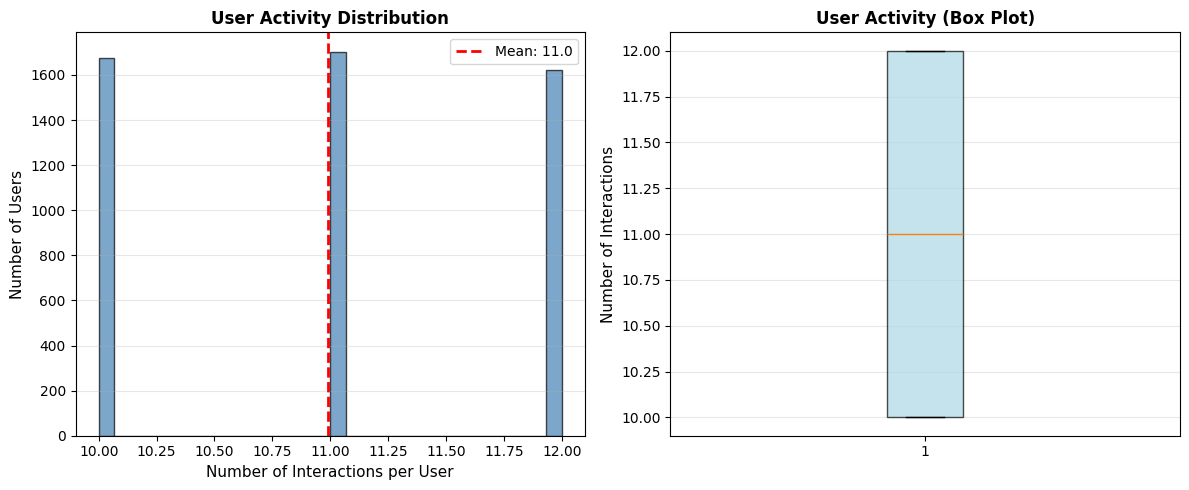

Min: 10
Max: 12
Mean: 10.99
Median: 11


In [27]:
print("=== User Activity Distribution ===")

# Count interactions per user
user_activity = interactions_df.groupby('user_id').size().reset_index(name='num_interactions')

# Plot
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.hist(user_activity['num_interactions'], bins=30, color='steelblue', edgecolor='black', alpha=0.7)
plt.xlabel('Number of Interactions per User', fontsize=11)
plt.ylabel('Number of Users', fontsize=11)
plt.title('User Activity Distribution', fontsize=12, fontweight='bold')
plt.axvline(user_activity['num_interactions'].mean(), color='red', linestyle='--', 
            linewidth=2, label=f"Mean: {user_activity['num_interactions'].mean():.1f}")
plt.legend()
plt.grid(axis='y', alpha=0.3)

plt.subplot(1, 2, 2)
plt.boxplot(user_activity['num_interactions'], vert=True, patch_artist=True,
            boxprops=dict(facecolor='lightblue', alpha=0.7))
plt.ylabel('Number of Interactions', fontsize=11)
plt.title('User Activity (Box Plot)', fontsize=12, fontweight='bold')
plt.grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.savefig('../results/user_activity_distribution.png', dpi=300, bbox_inches='tight')
plt.show()

print(f"Min: {user_activity['num_interactions'].min()}")
print(f"Max: {user_activity['num_interactions'].max()}")
print(f"Mean: {user_activity['num_interactions'].mean():.2f}")
print(f"Median: {user_activity['num_interactions'].median():.0f}")


# Item Popularity Distribution


=== Course Popularity Distribution ===



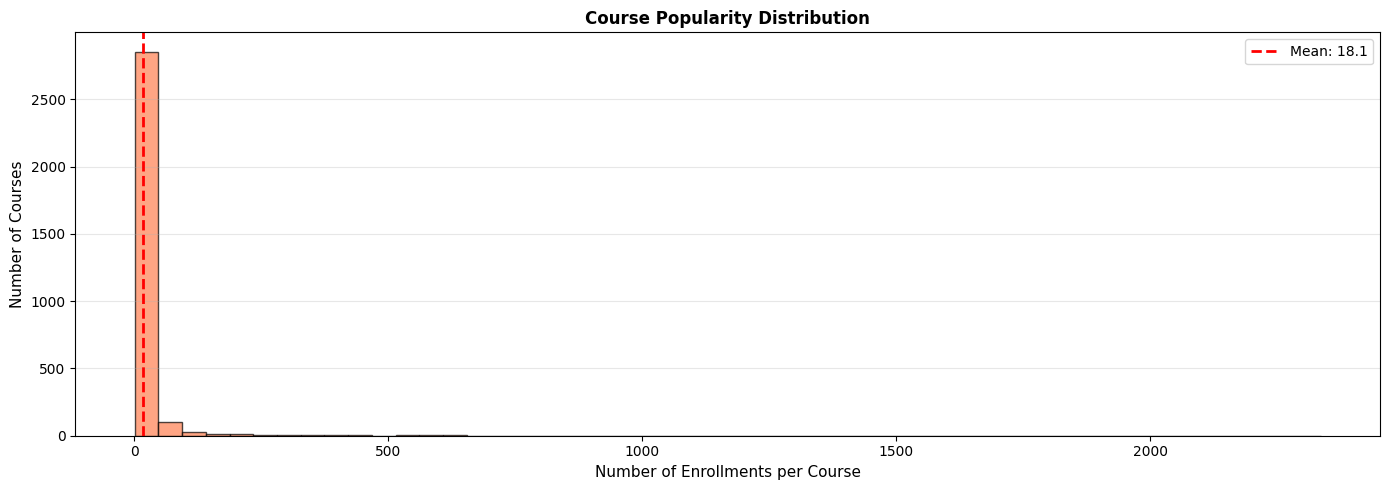

Total courses with enrollments: 3,043
Mean enrollments per course: 18.06
Median enrollments per course: 4
Max enrollments: 2,336

--- Top 10 Most Popular Courses ---
 1. 2336 enrollments: Learn HTML5 Programming From Scratch
 2. 1216 enrollments: How To Create a Website in a Weekend! (Project-Centered Cour
 3. 1062 enrollments: Coding for Entrepreneurs Basic
 4.  810 enrollments: Build Your First Website in 1 Week with HTML5 and CSS3
 5.  674 enrollments: Web Design for Web Developers: Build Beautiful Websites!
 6.  641 enrollments: iOS App Development with Swift
 7.  636 enrollments: JavaScript: Understanding the Weird Parts
 8.  609 enrollments: Angular 4 (formerly Angular 2) - The Complete Guide
 9.  590 enrollments: Data Science
10.  568 enrollments: The Science of Well-Being


In [ ]:
print("\n=== Course Popularity Distribution ===\n")

# Count interactions per course
item_popularity = interactions_df.groupby('course_index').size().reset_index(name='num_enrollments')
item_popularity_sorted = item_popularity.sort_values('num_enrollments', ascending=False).reset_index(drop=True)
item_popularity_sorted['rank'] = item_popularity_sorted.index + 1

# Plot
plt.figure(figsize=(14, 5))
plt.hist(item_popularity['num_enrollments'], bins=50, color='coral', edgecolor='black', alpha=0.7)
plt.xlabel('Number of Enrollments per Course', fontsize=11)
plt.ylabel('Number of Courses', fontsize=11)
plt.title('Course Popularity Distribution', fontsize=12, fontweight='bold')
plt.axvline(item_popularity['num_enrollments'].mean(), color='red', linestyle='--', 
            linewidth=2, label=f"Mean: {item_popularity['num_enrollments'].mean():.1f}")
plt.legend()
plt.grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.savefig('../results/course_popularity_distribution.png', dpi=300, bbox_inches='tight')
plt.show()

print(f"Total courses with enrollments: {len(item_popularity):,}")
print(f"Mean enrollments per course: {item_popularity['num_enrollments'].mean():.2f}")
print(f"Median enrollments per course: {item_popularity['num_enrollments'].median():.0f}")
print(f"Max enrollments: {item_popularity['num_enrollments'].max():,}")

print("\n--- Top 10 Most Popular Courses ---")
top_courses = item_popularity_sorted.head(10)
for idx, row in top_courses.iterrows():
    course_title = data_scaled.loc[row['course_index'], 'course_title']
    print(f"{idx+1:2d}. {row['num_enrollments']:4d} enrollments: {course_title[:60]}")


# Long-Tail Problem Analysis


=== Long-Tail Problem Analysis ===

Top 20% of courses (608 courses) receive 79.3% of all enrollments
Bottom 80% of courses (2435 courses) receive 20.7% of all enrollments


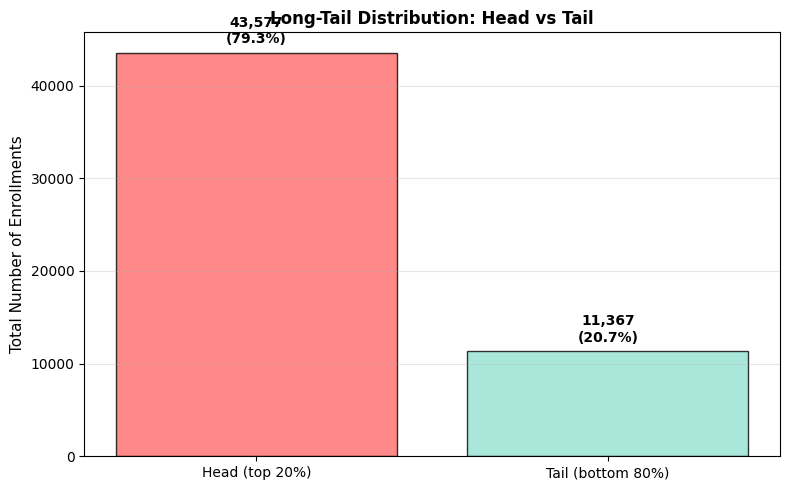


✓ Long-tail problem EXISTS:
  - Popular courses (head) dominate enrollments
  - Many courses in the tail receive little exposure
  - Recommendation system should help surface tail courses


In [30]:
print("\n=== Long-Tail Problem Analysis ===\n")

total_courses = len(item_popularity_sorted)
total_interactions = item_popularity['num_enrollments'].sum()

# Calculate what % of interactions top 20% of courses receive
top_20_pct_courses = int(0.2 * total_courses)
top_20_interactions = item_popularity_sorted.head(top_20_pct_courses)['num_enrollments'].sum()
top_20_coverage = (top_20_interactions / total_interactions) * 100

# Calculate 80/20 rule
top_20_pct = top_20_pct_courses
bottom_80_pct = total_courses - top_20_pct_courses

print(f"Top 20% of courses ({top_20_pct_courses} courses) receive {top_20_coverage:.1f}% of all enrollments")
print(f"Bottom 80% of courses ({bottom_80_pct} courses) receive {100-top_20_coverage:.1f}% of all enrollments")

# Visualize long-tail segments
segments = {
    'Head (top 20%)': item_popularity_sorted.head(top_20_pct_courses)['num_enrollments'].sum(),
    'Tail (bottom 80%)': item_popularity_sorted.tail(bottom_80_pct)['num_enrollments'].sum()
}

plt.figure(figsize=(8, 5))
plt.bar(segments.keys(), segments.values(), color=['#ff6b6b', '#95e1d3'], edgecolor='black', alpha=0.8)
plt.ylabel('Total Number of Enrollments', fontsize=11)
plt.title('Long-Tail Distribution: Head vs Tail', fontsize=12, fontweight='bold')
plt.grid(axis='y', alpha=0.3)
for i, (k, v) in enumerate(segments.items()):
    plt.text(i, v + 1000, f'{v:,}\n({v/total_interactions*100:.1f}%)', 
             ha='center', fontsize=10, fontweight='bold')
plt.tight_layout()
plt.savefig('../results/long_tail_problem.png', dpi=300, bbox_inches='tight')
plt.show()

if top_20_coverage > 50:
    print(f"\n✓ Long-tail problem EXISTS:")
    print(f"  - Popular courses (head) dominate enrollments")
    print(f"  - Many courses in the tail receive little exposure")
    print(f"  - Recommendation system should help surface tail courses")
else:
    print(f"\n✓ Long-tail problem is minimal in the dataset")
